# Independent Inquiry: 
## What was the mean age of children (defined as being less than 12 years old), $\bar{x}_{childrenAge}$, in the Titanic embarcation, with an $(1 - \alpha)\% $ confidence level? ($\alpha = 0.05$)

In [1]:
# Import useful packages
import pandas
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# import data
filename = '../Data/train.csv'
titanic_dataframe = pandas.read_csv(filename)
#titanic_dataframe.head() # for visualizing headers and first five rows of data.

In [26]:
titanic_sample_size_n = len(titanic_dataframe)
children_sample_size_n = len(titanic_dataframe.loc[titanic_dataframe['Age'] <= 12])
print('Sample Size All Titanic Passengers:', sample_size_n)
print('Sample Size Children Passengers:', children_sample_size_n)



Sample Size All Titanic Passengers: 891
Sample Size Children Passengers: 69


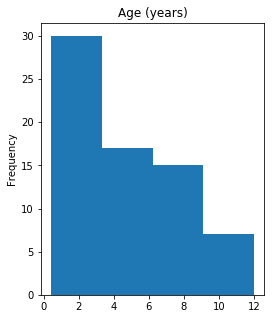

In [25]:
# Define a function for plotting a histogram of a column in a dataframe

def histogramplot(dataframe, column_name):
    plt.figure()
    dataframe[column_name].plot.hist(bins = 4, figsize = (4,5))
    plt.title(column_name + ' (years)')
    

children_dataframe = titanic_dataframe.loc[titanic_dataframe['Age'] <= 12]
histogramplot(children_dataframe, 'Age')

As it can be observed, the distributions is not normal. However, the principles of the central limit theorem allows us to estimate the mean, as the sampling distribution of the sample mean is, conceptually, normal.

In [32]:
def confidence_interval(sample, confidence_level, to_print):
    sample_mean = np.mean(sample) # Sample Mean, point estimate
    z = stats.norm.ppf(1 - (1 - confidence_level)/2)
    # We may not have the standard deviation, but we may estimate
    # the SE of the Sampling Distribution of the Sample Mean
    # by dividing the Standard Deviation of the sample itself by n^2
    SE = np.std(sample) / len(sample)**(1/2)
    # We assume we may use the Standard Deviation of the Sample as 
    # if it was the Standard Deviation of the Population
    lowbound = sample_mean - z*SE
    highbound = sample_mean + z*SE
    
    if to_print:
        print('Point Estimate', sample_mean)
        print('Confidence Interval', lowbound, highbound)
        print('Confidence Level:', confidence_level)
    
    return lowbound,highbound
    
confidence_interval(children_dataframe['Age'], 0.95, True)

Point Estimate 4.770579710144927
Confidence Interval 3.97642857732 5.56473084297
Confidence Level: 0.95


(3.9764285773224448, 5.5647308429674105)

# Independent Inquiry: 
## What was proportion of children (defined as being less than 12 years old) that did not survive, $\hat{p}_{nonSurvivingChildren}$, in the Titanic embarcation, with an $(1 - \alpha)\%$ confidence level? ($\alpha = 0.05$)

In [39]:
# Define a function for confidence intervals with proportions
def confidence_interval_proportions(sample_size_n, sample_proportion_p,confidence_level, to_print):
    point_estimate = sample_proportion_p
    z = stats.norm.ppf(1-(1-confidence_level)/2)
    SE = (sample_proportion_p * (1-sample_proportion_p)/sample_size_n)
    
    lowbound = point_estimate - z*SE
    highbound = point_estimate + z*SE
    
    if to_print:
        print('Point estimate', point_estimate)
        print(str(confidence_level*100)+"% confidence interval: ", [lowbound,highbound])
        
    return [lowbound, highbound]

## Proportion of children who did not survived

In [36]:
total_children = children_sample_size_n
non_surviving_children_total = len(children_dataframe.loc[children_dataframe['Survived'] == 0])
non_surviving_children_proportion = non_surviving_children_total / total_children
print('Total children: ', total_children)
print('Non Surviving Children: ', non_surviving_children_total)
print('Non Surviving Children Proportion: ', non_surviving_children_proportion)
                                   

Total children:  69
Non Surviving Children:  29
Non Surviving Children Proportion:  0.42028985507246375


## Confidence Interval for proportion of children who did not survived

In [40]:
confidence_interval_proportions(total_children,non_surviving_children_proportion,.95,True)

Point estimate 0.42028985507246375
95.0% confidence interval:  [0.41336901508918639, 0.42721069505574111]


[0.41336901508918639, 0.42721069505574111]